<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/river_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install microprediction
!pip install git+https://github.com/online-ml/river --upgrade

In [4]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='electricity-lbmp-nyiso-pjm.json')
YS[:3]

[50.5, 50.71, 40.04]

In [5]:
from river import linear_model, optim, preprocessing, time_series

In [6]:
def run(ys):
   model = ( time_series.SNARIMAX( p=0, d=0, q=0, m=1, sp=0,sq=0,
             regressor=(
                preprocessing.StandardScaler() |
                linear_model.LinearRegression(
                    intercept_init=110,
                     optimizer=optim.SGD(0.01),
                 intercept_lr=0.3
              )
            )
      )
   )
   y_hats = list()
   for i,y in enumerate(ys):
      if i>0:
         y_hat = model.forecast(horizon=1)[0]
      else:
         y_hat = 0.0 
      y_hats.append(y_hat)
      model = model.learn_one(x=None,y=y)
   return y_hats


In [10]:
XS = run(YS)
XS[:3]

[0.0, 74.30000000000001, 60.14600000000001]

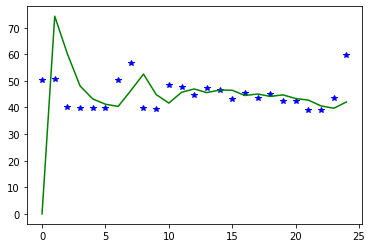

In [12]:
import matplotlib.pyplot as plt
plt.plot(YS[:25],'*b')
plt.plot(XS[:25],'g')